In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
288,3488-PGMQJ,Male,1,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.50,606.55,Yes
6616,9600-NAXZN,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.40,4528,Yes
5142,6408-OTUBZ,Female,0,No,No,66,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),104.55,6779.05,No
3837,3932-CMDTD,Female,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,105.65,443.9,Yes
1349,2625-TRCZQ,Female,0,Yes,No,51,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,49.65,2553.35,No


In [3]:
df.drop('customerID', axis='columns' , inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isna()].shape

(11, 20)

In [6]:
df1 = df[df.TotalCharges !=' ']

In [7]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [9]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\10726620\AppData\Local\Temp\ipykernel_6432\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [10]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1945,Female,0,Yes,Yes,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.50,1500.95,No
6996,Female,0,Yes,Yes,41,Yes,No,DSL,No,Yes,No,Yes,No,Yes,One year,Yes,Bank transfer (automatic),66.50,2728.60,Yes
5239,Male,0,Yes,Yes,68,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),105.75,7322.50,No
3295,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Bank transfer (automatic),80.20,5714.20,No
358,Male,1,Yes,No,27,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Credit card (automatic),30.75,805.10,Yes


In [12]:
churn_No = df1[df.Churn=='No'].tenure
churn_Yes = df1[df.Churn=='Yes'].tenure

C:\Users\10726620\AppData\Local\Temp\ipykernel_6432\3383479103.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  churn_No = df1[df.Churn=='No'].tenure
C:\Users\10726620\AppData\Local\Temp\ipykernel_6432\3383479103.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  churn_Yes = df1[df.Churn=='Yes'].tenure


Text(0.5, 1.0, 'Customer churn prediction')

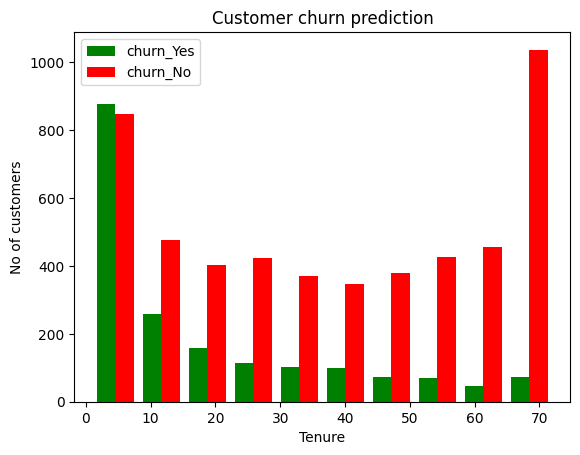

In [13]:
plt.hist([churn_Yes,churn_No],color=['green','red'],label=['churn_Yes','churn_No'])
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('No of customers')
plt.title('Customer churn prediction')

In [14]:
for column in df1:
    # print(column , ':' , df[column].unique())
    print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [15]:
def unique_column_values(df1):
    for column in df1:
        if df1[column].dtypes == 'object':
            print(f'{column} : {df1[column].unique()}')

In [16]:
unique_column_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [17]:
df2 = df1.copy()

In [18]:
df2.replace('No phone service','No',inplace=True)
df2.replace('No internet service','No',inplace=True)

In [19]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [20]:
unique_column_values(df2)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
col_having_YesNo = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [22]:
for column in col_having_YesNo:
    df2[column].replace({'Yes':1,'No':0},inplace=True)

In [23]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5028,Female,0,0,0,72,1,0,Fiber optic,1,1,1,1,1,1,Two year,1,Electronic check,109.90,7624.20,0
4935,Male,1,1,0,45,1,1,No,0,0,0,0,0,0,One year,0,Credit card (automatic),24.70,1174.35,0
5778,Female,0,0,0,1,1,0,No,0,0,0,0,0,0,Month-to-month,0,Credit card (automatic),20.30,20.30,0
4941,Male,0,0,0,3,1,0,No,0,0,0,0,0,0,Month-to-month,1,Mailed check,19.80,58.15,1
3805,Male,1,0,0,1,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,71.65,71.65,1


In [26]:
for column in df2:
    print(f'{column} : {df2[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [28]:
df2['gender'].replace({'Male':0,'Female':1},inplace=True)

In [34]:
df3 = pd.get_dummies(data=df2, columns=['InternetService', 'Contract', 'PaymentMethod'],dtype=int)

In [35]:
df3.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4335,1,1,0,0,18,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1719,0,0,0,0,3,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
4315,1,0,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [36]:
df3.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [39]:
column_to_scale = ['MonthlyCharges', 'TotalCharges', 'tenure']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df3[column_to_scale] = scaler.fit_transform(df3[column_to_scale])

In [43]:
for col in column_to_scale:
    print(f"{col} : {df3[col].unique()}")

MonthlyCharges : [0.11542289 0.38507463 0.35422886 ... 0.44626866 0.25820896 0.60149254]
TotalCharges : [0.0012751  0.21586661 0.01031041 ... 0.03780868 0.03321025 0.78764136]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]


Data Preprocessing is done, lets move to machine learning part

In [63]:
X = df3.drop('Churn', axis='columns')
y = df3['Churn']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
X_train.shape

(5625, 26)

In [67]:
X_test.shape

(1407, 26)

In [68]:
import tensorflow as tf
from tensorflow import keras

In [69]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [73]:

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.7968
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4212 - accuracy: 0.8005
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4194 - accuracy: 0.8020
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4173 - accuracy: 0.8037
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.8023
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4152 - accuracy: 0.8032
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4141 - accuracy: 0.8068
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4137 - accuracy: 0.8112
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4121 - accuracy: 0.8089
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4107 - accura

In [74]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4514 - accuracy: 0.7882


[0.4513593316078186, 0.7882018685340881]

In [75]:
yp = model.predict(X_test)
yp[:6]

44/44 [==============================] - 0s 2ms/step


array([[0.22255269],
       [0.08730938],
       [0.24660172],
       [0.83153385],
       [0.8878485 ],
       [0.27519596]], dtype=float32)

In [76]:
y_pred =[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        

In [77]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1038
           1       0.61      0.53      0.57       369

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [78]:
confusion_matrix(y_test,y_pred)

array([[913, 125],
       [173, 196]], dtype=int64)

In [79]:
tf.math.confusion_matrix(y_test, y_pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[913, 125],
       [173, 196]])>

Text(45.722222222222214, 0.5, 'Truth')

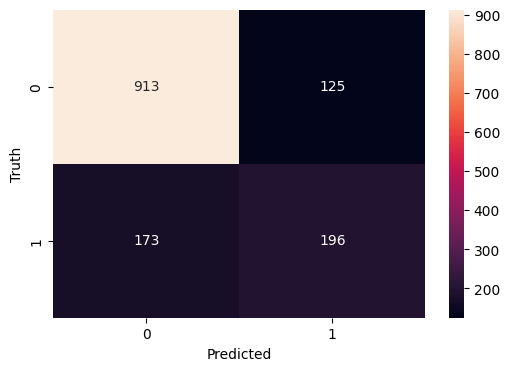

In [85]:
import seaborn as sn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True,fmt='d',)
plt.xlabel('Predicted')
plt.ylabel('Truth') 
